In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import pandas as pd

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
crop_data = pd.read_csv("crop_data.csv")
crop_data.head()

,Latitude and Longitude,Class of Land,vh,vv,RVI
0,"(10.323727047081501, 105.2516346045924)",Rice,0.058029,0.184111,0.835817
1,"(10.322364360592521, 105.27843410554115)",Rice,0.034609,0.190940,0.569497
2,"(10.321455902933202, 105.25254306225168)",Rice,0.041346,0.276820,0.487221
3,"(10.324181275911162, 105.25118037576274)",Rice,0.049539,0.170033,0.767749
4,"(10.324635504740822, 105.27389181724476)",Rice,0.048815,0.297672,0.522453


## Model Building


<p align="justify"> Now let us select the columns required for our model building exercise. We will consider only VV and VH for our model. It does not make sense to use latitude and longitude as predictor variables as they do not have any impact on presence of rice crop.</p>

In [3]:
crop_data = crop_data[['vh','vv','RVI','Class of Land']]

### Train and Test Split 

<p align="justify">We will now split the data into 70% training data and 30% test data. Scikit-learn alias “sklearn” is a robust library for machine learning in Python. The scikit-learn library has a <i><b>model_selection</b></i> module in which there is a splitting function <i><b>train_test_split</b></i>. You can use the same.</p>

In [4]:
X = crop_data.drop(columns=['Class of Land']).values
y = crop_data ['Class of Land'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=40)

### Feature Scaling 

<p align="justify"> Before initiating the model training we may have to execute different data pre-processing steps. Here we are demonstrating the scaling of VV and VH variable by using Standard Scaler.</p>

<p align = "justify">Feature Scaling is a data preprocessing step for numerical features. Many machine learning algorithms like Gradient descent methods, KNN algorithm, linear and logistic regression, etc. require data scaling to produce good results. Scikit learn provides functions that can be used to apply data scaling. Here we are using Standard Scaler.</p>

<h4 style="color:rgb(195, 52, 235)"><strong>Tip 4 </strong></h4>
<p align="justify">Participants might explore other feature scaling techniques like Min Max Scaler, Max Absolute Scaling, Robust Scaling etc.</p>

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Training

<p justify ="align">Now that we have the data in a format appropriate for machine learning, we can begin training a model. In this demonstration notebook, we have used a binary logistic regression model from the scikit-learn library. This library offers a wide range of other models, each with the capacity for extensive parameter tuning and customization capabilities.</p>

<p justify ="align">Scikit-learn models require separation of predictor variables and the response variable. You have to store the predictor variables in array X and the response variable in the array Y. You must make sure not to include the response variable in array X. It also doesn't make sense to use latitude and longitude as predictor variables in such a confined area, so we drop those too.</p>

In [6]:
# Create and train logistic regression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train,y_train)

# Create and train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create and train neural nets model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Create and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Create and train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Create and train Decision Trees model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Model Evaluation

Now that we have trained our model , all that is left is to evaluate it. For evaluation we will generate the classification report and will plot the confusion matrix. Scikit-learn provides many other metrics that can be used for evaluation. You can even write a code on your own.

### In-Sample Evaluation
<p align="Jutisfy"> We will be generating a classification report and a confusion matrix for the training data. It must be stressed that this is in-sample performance testing , which is the performance testing on the training dataset. These metrics are NOT truly indicative of the model's performance. You should wait to test the model performance on the test data before you feel confident about your model.</p>

In this section, we make predictions on the training set and store them in the <b><i>insample_ predictions</i></b> variable. A confusion matrix is generated to gauge the robustness of the model. 

In [7]:
insample_predictions_LR = lr_model.predict(X_train)
insample_predictions_RF = rf_model.predict(X_train)
insample_predictions_NN = nn_model.predict(X_train)
insample_predictions_NB = nb_model.predict(X_train)
insample_predictions_GB = gb_model.predict(X_train)
insample_predictions_DT = dt_model.predict(X_train)
insample_predictions_KNN = knn_model.predict(X_train)

In [8]:
print('******Logistic Regression******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_LR,y_train)))
print(classification_report(insample_predictions_LR,y_train))
print('\n')
print('******Random Forest******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_RF,y_train)))
print(classification_report(insample_predictions_RF,y_train))
print('\n')
print('******Neural Nets******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_NN,y_train)))
print(classification_report(insample_predictions_NN,y_train))
print('\n')
print('******Naive Bayes******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_NB,y_train)))
print(classification_report(insample_predictions_NB,y_train))
print('\n')
print('******Gradient Boosting******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_GB,y_train)))
print(classification_report(insample_predictions_GB,y_train))
print('\n')
print('******Decision Tree******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_DT,y_train)))
print(classification_report(insample_predictions_DT,y_train))
print('\n')
print('******KNeighbors******')
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions_KNN,y_train)))
print(classification_report(insample_predictions_KNN,y_train))

******Logistic Regression******
Insample Accuracy 74.05%
              precision    recall  f1-score   support

    Non Rice       0.85      0.70      0.77       257
        Rice       0.63      0.81      0.71       163

    accuracy                           0.74       420
   macro avg       0.74      0.75      0.74       420
weighted avg       0.77      0.74      0.74       420



******Random Forest******
Insample Accuracy 100.00%
              precision    recall  f1-score   support

    Non Rice       1.00      1.00      1.00       210
        Rice       1.00      1.00      1.00       210

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



******Neural Nets******
Insample Accuracy 86.19%
              precision    recall  f1-score   support

    Non Rice       0.90      0.84      0.87       226
        Rice       0.82      0.89      0.86       194

    accuracy        

<p> For plotting a confusion matrix we define the function <b><i>plot_confusion_matrix</i></b>.

In [9]:
def plot_confusion_matrix(true_value,predicted_value,title,labels):
    '''
    Plots a confusion matrix.
    Attributes:
    true_value - The ground truth value for comparision.
    predicted_value - The values predicted by the model.
    title - Title of the plot.
    labels - The x and y labels of the plot.
    '''
    cm = confusion_matrix(true_value,predicted_value)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);

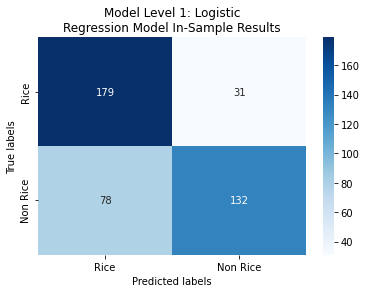

In [10]:
plot_confusion_matrix(y_train,insample_predictions_LR,"Model Level 1: Logistic\nRegression Model In-Sample Results",['Rice', 'Non Rice'])

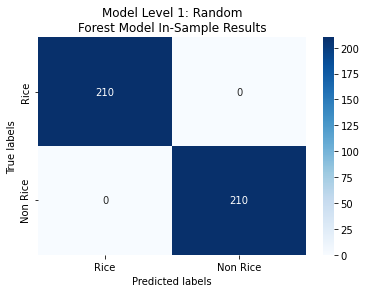

In [11]:
plot_confusion_matrix(y_train,insample_predictions_RF,"Model Level 1: Random\nForest Model In-Sample Results",['Rice', 'Non Rice'])

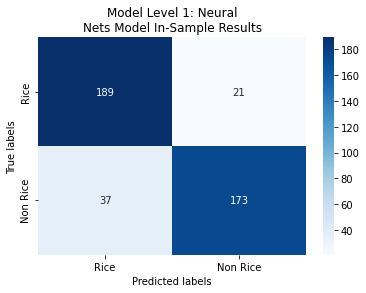

In [12]:
plot_confusion_matrix(y_train,insample_predictions_NN,"Model Level 1: Neural\nNets Model In-Sample Results",['Rice', 'Non Rice'])

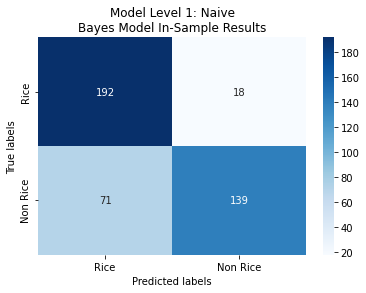

In [13]:
plot_confusion_matrix(y_train,insample_predictions_NB,"Model Level 1: Naive\nBayes Model In-Sample Results",['Rice', 'Non Rice'])

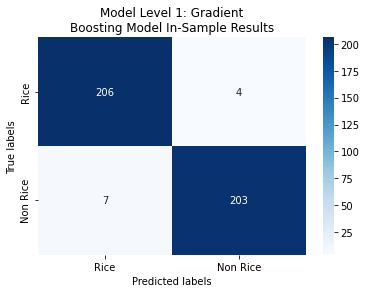

In [14]:
plot_confusion_matrix(y_train,insample_predictions_GB,"Model Level 1: Gradient\nBoosting Model In-Sample Results",['Rice', 'Non Rice'])

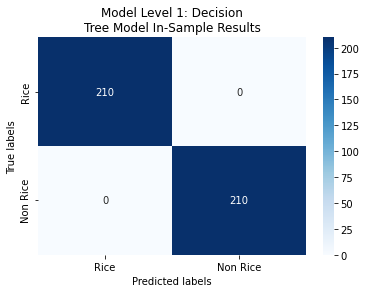

In [15]:
plot_confusion_matrix(y_train,insample_predictions_DT,"Model Level 1: Decision\nTree Model In-Sample Results",['Rice', 'Non Rice'])

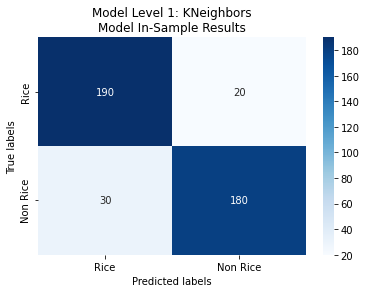

In [16]:
plot_confusion_matrix(y_train,insample_predictions_KNN,"Model Level 1: KNeighbors\nModel In-Sample Results",['Rice', 'Non Rice'])

### Out-Sample Evaluation

When evaluating a machine learning model, it is essential to correctly and fairly evaluate the model's ability to generalize. This is because models have a tendency to overfit the dataset they are trained on. To estimate the out-of-sample performance, we will predict on the test data now. 

In [17]:
outsample_predictions_LR = lr_model.predict(X_test)
outsample_predictions_RF = rf_model.predict(X_test)
outsample_predictions_NN = nn_model.predict(X_test)
outsample_predictions_NB = nb_model.predict(X_test)
outsample_predictions_GB = gb_model.predict(X_test)
outsample_predictions_DT = dt_model.predict(X_test)
outsample_predictions_KNN = knn_model.predict(X_test)

In [18]:
print("*******Logistic Regression******")
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_LR, y_test)))
print(classification_report(y_test, outsample_predictions_LR))
print('\n')
print("*******Random Forest******")
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_RF, y_test)))
print(classification_report(y_test, outsample_predictions_RF))
print('\n')
print("*******Neural Nets******")
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_NN, y_test)))
print(classification_report(y_test, outsample_predictions_NN))
print('\n')
print('******Naive Bayes******')
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_NB, y_test)))
print(classification_report(y_test, outsample_predictions_NB))
print('\n')
print('******Gradient Boosting******')
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_GB, y_test)))
print(classification_report(y_test, outsample_predictions_GB))
print('\n')
print('******Decision Tree******')
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_DT, y_test)))
print(classification_report(y_test, outsample_predictions_DT))
print('\n')
print('******KNeighbors******')
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions_KNN, y_test)))
print(classification_report(y_test, outsample_predictions_KNN))

*******Logistic Regression******
Accuracy 66.67%
              precision    recall  f1-score   support

    Non Rice       0.65      0.72      0.68        90
        Rice       0.69      0.61      0.65        90

    accuracy                           0.67       180
   macro avg       0.67      0.67      0.67       180
weighted avg       0.67      0.67      0.67       180



*******Random Forest******
Accuracy 85.56%
              precision    recall  f1-score   support

    Non Rice       0.87      0.83      0.85        90
        Rice       0.84      0.88      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



*******Neural Nets******
Accuracy 86.11%
              precision    recall  f1-score   support

    Non Rice       0.84      0.90      0.87        90
        Rice       0.89      0.82      0.86        90

    accuracy                           0.86  

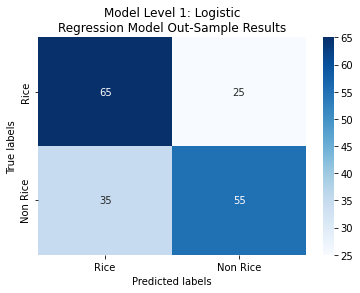

In [19]:
plot_confusion_matrix(y_test, outsample_predictions_LR,"Model Level 1: Logistic\nRegression Model Out-Sample Results",['Rice', 'Non Rice'])

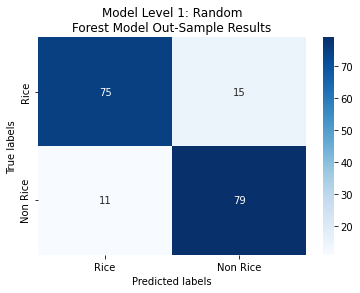

In [20]:
plot_confusion_matrix(y_test, outsample_predictions_RF,"Model Level 1: Random\nForest Model Out-Sample Results",['Rice', 'Non Rice'])

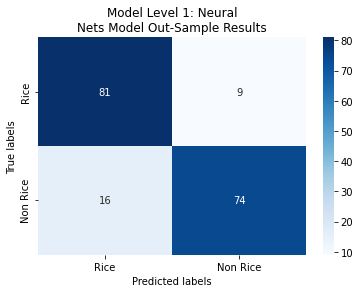

In [21]:
plot_confusion_matrix(y_test, outsample_predictions_NN,"Model Level 1: Neural\nNets Model Out-Sample Results",['Rice', 'Non Rice'])

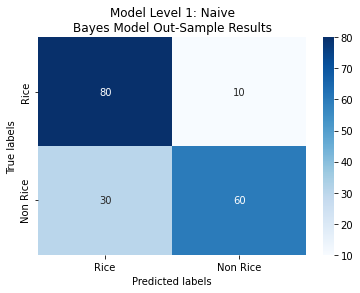

In [22]:
plot_confusion_matrix(y_test, outsample_predictions_NB,"Model Level 1: Naive\nBayes Model Out-Sample Results",['Rice', 'Non Rice'])

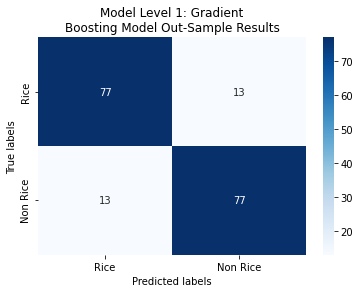

In [23]:
plot_confusion_matrix(y_test, outsample_predictions_GB,"Model Level 1: Gradient\nBoosting Model Out-Sample Results",['Rice', 'Non Rice'])

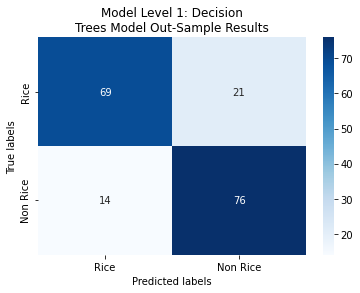

In [24]:
plot_confusion_matrix(y_test, outsample_predictions_DT,"Model Level 1: Decision\nTrees Model Out-Sample Results",['Rice', 'Non Rice'])

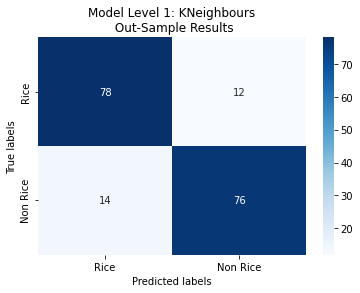

In [25]:
plot_confusion_matrix(y_test, outsample_predictions_KNN,"Model Level 1: KNeighbours\n Out-Sample Results",['Rice', 'Non Rice'])

In [26]:
''' Parameter caliberation technique 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# Assuming X_train, X_test, y_train, y_test are your training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best model from the search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy after Calibration: {rf_accuracy}")

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\nfrom scipy.stats import randint\n\n# Assuming X_train, X_test, y_train, y_test are your training and testing data\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Create a Random Forest model\nrf_model = RandomForestClassifier()\n\n# Define hyperparameter grid\nparam_dist = {\n    \'n_estimators\': randint(10, 200),\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\', None],\n    \'max_depth\': randint(1, 20),\n    \'min_samples_split\': randint(2, 20),\n    \'min_samples_leaf\': randint(1, 20),\n    \'bootstrap\': [True, False],\n}\n\n# Use RandomizedSearchCV for hyperparameter tuning\nrandom_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)\nrandom_search.fit(X_trai